In [1]:
import pandas as pd

relacoes_entre_cnpjs = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/relacao_cnpjs.csv',
    header=None,
    dtype=str,
    sep=' '
)

informacoes_licitacoes = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/infos_licitacoes.csv',
    dtype=str,
    sep=';'
)

cnpjs_por_licitacao = pd.read_csv(
    '/home/pedro/code/trabalho/M04/M04_2021/data/input/licitacoes_cnpjs_licitantes.csv',
    dtype=str,
    sep=';'
)

# Encontrando cliques de cnpjs relacionados para licitacoes

## Selecionando os CNPJs correspondentes a licitacao escolhida

In [2]:
licitacao = '892265'
cnpjs_licitantes = cnpjs_por_licitacao.loc[cnpjs_por_licitacao['seq_dim_licitacao'] == licitacao]
cnpjs_licitantes

,seq_dim_licitacao,num_documento
48280,892265,26928083000177
90454,892265,18745070000134
90455,892265,14810292000132
90456,892265,17327048000101
90457,892265,11650569000119
...,...,...
397604,892265,15163783000100
397605,892265,26930124000160
420611,892265,18723052000151
420612,892265,26929772000104


## Criacao do Grafo de CNPJs

In [3]:
import networkx as nx

G = nx.Graph()

# deve existir uma forma mais inteligente de fazer isso usando funcoes nativas
for cnpj in cnpjs_licitantes['num_documento']:
    relacoes_do_cnpj = relacoes_entre_cnpjs.loc[relacoes_entre_cnpjs[0] == cnpj]

    for relacao in relacoes_do_cnpj.values:
        G.add_edge(relacao[0], relacao[1])

cliques = list(nx.find_cliques(G))
tamanho_cliques = [len(clique) for clique in cliques]

## Algumas informacoes do grafo para essa licitacao:

### Clique de maior tamanho (max clique?)

In [4]:
max(tamanho_cliques)

39

### Densidade

In [5]:
nx.density(G)

0.3296143250688705

### Numero de arestas

In [6]:
len(list(G.edges))

2393

In [22]:
G.number_of_edges()

2393

### Numero de nodos

In [7]:
len(list(G.nodes))

121

In [24]:
G.number_of_nodes()

121

Para essa licitacao, primeira linha do arquivo RELATORIO_GRAFOS_POR_LICITACAO.csv, os valores encontrados pelo script sao:

- Max clique: 38

- Arestas: 64

- Vertices: 704

- Densidade: 0,349206349206349


### Visualizando o grafo para a licitacao

In [8]:
import matplotlib.pyplot as plt

def plota_grafo(grafo: nx.Graph) -> plt.figure:
    """Plota o grafo.
    """    
    plt.figure(figsize=(15, 15))    
    pos = nx.spring_layout(grafo)
    nx.draw_networkx_nodes(grafo, pos, node_size=5)
    nx.draw_networkx_edges(grafo, pos)
    plt.show()

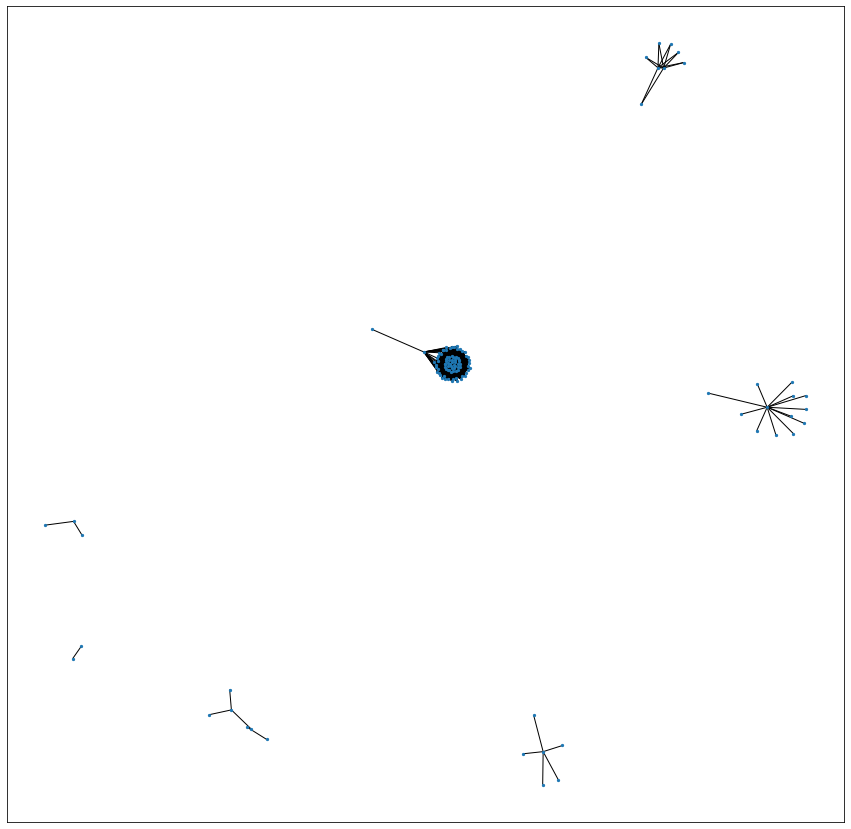

In [9]:
plota_grafo(G)